- Bu notebookda basit grafik çizimleri gerçek veri setlerine benzer şekilde yapılmıştır. 
- İlgili grafik neden kullanılır. Hangi sorulara cevap verir açıklanmıştır. 
- En son kısımda Heatmap grafiği yorumlama detaylandırılmıştır.
- Bu grafikler ile temel bir Exploratory Data Analysis(EDA)- Keşifsel Veri Analizi- yapılır.
- 
- EDA (Exploratory Data Analysis), modelleme öncesinde veriyi tanımak, dağılımları, ilişkileri ve veri kalitesini anlamak için yapılan keşif sürecidir.
  
- Neden bu kadar önemli?
  
- Çünkü:
  
- Modelden önce hatalar burada yakalanır.
- Yanlış veriden yanlış model çıkmaz.
- Feature engineering burada başlar.
- İyi EDA → daha iyi model demektir.

## ALIŞTIRMA 1 — Sayısal değişkenin dağılımını inceleme (Histogram)
- 🎯 Amaç
- Bu veri analizinde:
- “Bu değişken nasıl dağılıyor? Çarpık mı? Normal mi?”
- sorusunu cevaplamak.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "age": [22, 25, 29, 31, 35, 40, 45, 50, 28, 33, 37, 42],
    "salary": [18000, 22000, 28000, 32000, 40000, 48000, 52000, 60000, 30000, 35000, 42000, 50000],
    "experience": [0, 1, 3, 5, 7, 10, 12, 15, 4, 6, 8, 11],
    "department": ["IT", "HR", "IT", "Finance", "IT", "Finance", "HR", "IT", "HR", "Finance", "IT", "Finance"],
    "performance_score": [60, 65, 70, 75, 80, 85, 88, 90, 72, 78, 83, 87]
}

df = pd.DataFrame(data)

### 🎯 Görev – Histogram (gerçek EDA mantığıyla)
- Amaç:
- salary değişkeninin dağılımını incelemek.
- Yapman gerekenler:
- df["salary"] kullan
- histogram çiz
- bins=10 kullan
- x eksenini etiketle
- y eksenini etiketle
- başlık ekle
- grid aç
- plt.show() ile bitir

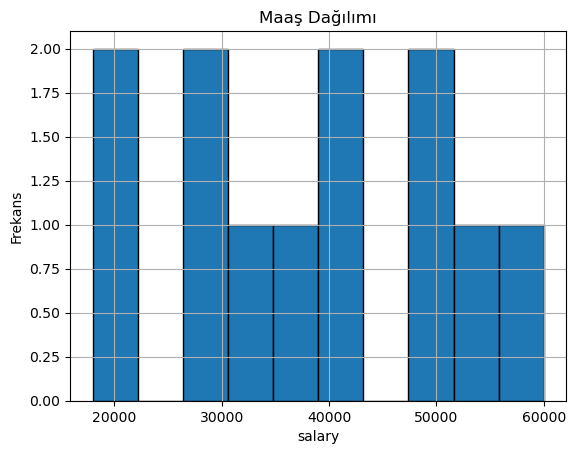

In [8]:
plt.hist(df["salary"], bins=10, edgecolor="black") #Bu, çubuk sınırlarını netleştirir.
plt.xlabel("salary")
plt.ylabel("Frekans")
plt.title("Maaş Dağılımı")
plt.grid(True)
plt.show()

- 🔍 Gerçek hayatta bu grafikle ne yorumlanır?
- Bu histogram üzerinden şunlar cevaplanır:
- Maaşlar belirli aralıklarda yoğunlaşıyor mu?
- Dağılım sağa mı sola mı çarpık?
- Uç (outlier) maaşlar var mı?
- Ortalama mı medyan mı daha anlamlı?

## ALIŞTIRMA 2 — Kategorik Veri → Bar Chart
- 🎯 Amaç
- Departmanlara göre kaç kişi var görmek.

### 🎯 Görev
- department sütunu için:
- kategori frekanslarını hesapla
- bar chart çiz
- başlık ekle
- eksenleri adlandır
- grafiği göster

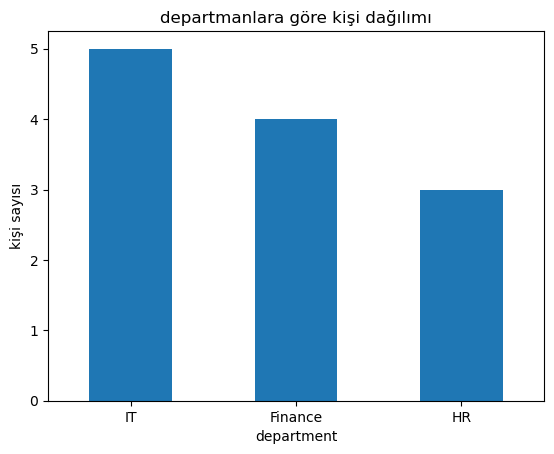

In [14]:
df["department"].value_counts().plot(kind="bar", rot=0) #Etiketlerin yatık olmasını engeller.
plt.xlabel("department")
plt.ylabel("kişi sayısı")
plt.title("departmanlara göre kişi dağılımı")
plt.show()

- 📌 Gerçek EDA’da bu grafik ne işe yarar?
- Bu grafikle şunlar cevaplanır:
- Hangi departmanlarda daha fazla çalışan var
- Veri dengesiz mi 
- Modelleme yapılacaksa bazı kategoriler baskın mı

### ALIŞTIRMA 3 — Scatter Plot
- (İki sayısal değişken arasındaki ilişki)
- 🎯 Amaç
- "Deneyim arttıkça maaş artıyor mu?" sorusunu görselleştirmek.
- Bu grafik:
- korelasyon ön analizi
- regresyon öncesi keşif
- veri ilişkisi tespiti
- için kullanılır.

### 🎯 Görev
- experience ile salary arasındaki ilişkiyi çiz.
- Yapman gerekenler:
- plt.scatter() kullan
- x ekseni → experience
- y ekseni → salary
- başlık ekle
- grid aç
- show()

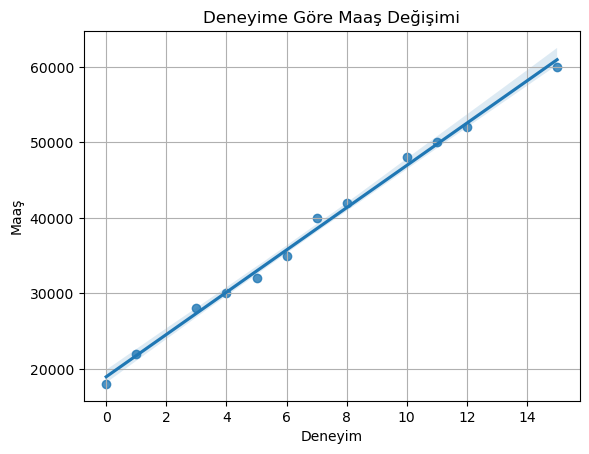

In [19]:
import seaborn as sns
# plt.scatter(df["experience"], df["salary"])  çizgi olmadan sadece noktalar ile gösterir.

sns.regplot(x="experience", y="salary", data=df)  # ilişkiyi hem noktalarla hem regresyon çizgisiyle gösterir.
plt.xlabel("Deneyim")
plt.ylabel("Maaş")
plt.title("Deneyime Göre Maaş Değişimi")
plt.grid(True)
plt.show()

- 📊 Bu grafik EDA’da nasıl yorumlanır?
- Bu grafiğe bakarak şunlar cevaplanır:
- Deneyim arttıkça maaş artma eğiliminde mi?
- İlişki doğrusal mı?
- Aykırı maaş değerleri var mı?
- Regresyon için uygun bir ilişki var mı?
- Bu sorular makine öğrenmesi öncesi temel karar noktalarıdır.

### ALIŞTIRMA 4 — Boxplot (Aykırı Değer Analizi)
- 🎯 Amaç
- Sayısal değişkende:
- uç değer var mı?
- dağılım simetrik mi?
- medyan nerede?
- görmek.

### 🎯 Görev
- salary değişkeni için boxplot çiz.
- Yapman gerekenler:
- seaborn kullan (sns.boxplot)
- sadece tek kolon göster
- başlık ekle
- grafiği göster

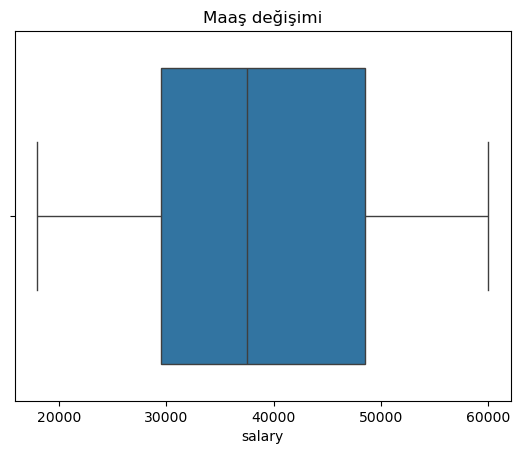

In [20]:
import seaborn as sns

sns.boxplot(x=df["salary"])
plt.title("Maaş değişimi")
plt.show()

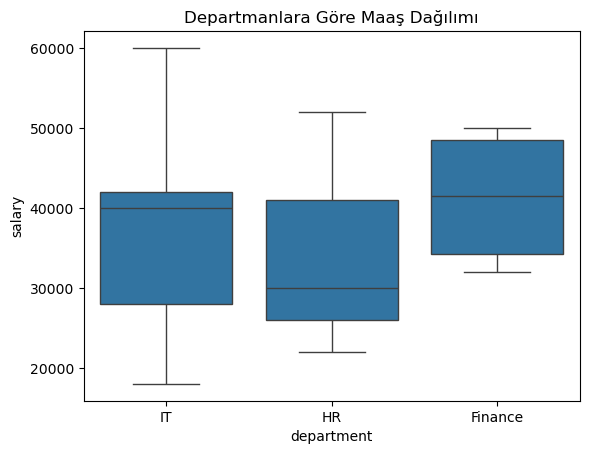

In [21]:
# Aynı boxplot’ı kategorilere göre yapmak çok yaygındır:

sns.boxplot(x="department", y="salary", data=df)
plt.title("Departmanlara Göre Maaş Dağılımı")
plt.show()

- 📊 Bu boxplot ile ne yorumlanır?
- Bu grafik üzerinden şunlar analiz edilir:
- Medyan maaş nerede?
- Maaş dağılımı sağa mı sola mı çarpık?
- Aykırı değerler (outlier) var mı?
- Üst/alt çeyrekler arası fark ne kadar?

### ALIŞTIRMA 5 — Korelasyon Heatmap
- 🎯 Amaç
- Sayısal değişkenler arasındaki ilişkiyi tek bakışta görmek.
- Bu grafik:
- feature selection
- model öncesi ilişki analizi
- multicollinearity kontrolü
- için kullanılır.

### 🎯 Görev
- Sadece sayısal kolonları seç
- korelasyon matrisi oluştur
- sns.heatmap() ile çiz
- değerleri yazdır (annot=True)
- renk haritası ekle

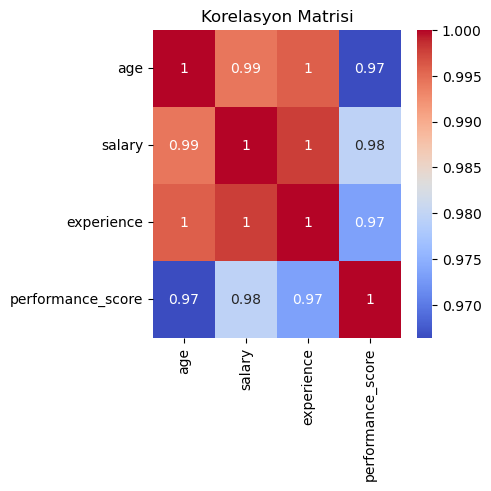

In [24]:
numeric_df = df.select_dtypes(include=["int64", "float64"]) ## sadece sayısal kolonları seç

corr = numeric_df.corr () ## korelasyon matrisi

plt.figure(figsize=(4, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm") ## heatmap çizimi
plt.title("Korelasyon Matrisi")
plt.show()

- 📊 Bu grafik nasıl yorumlanır?
- Korelasyon değerleri:
- +1’e yakın → güçlü pozitif ilişki
- −1’e yakın → güçlü negatif ilişki
- 0’a yakın → ilişki yok
  
- Örnek yorumlar:
- experience ↔ salary yüksekse → regresyon için güçlü aday
- iki değişken çok yüksek korelasyonluysa → multicollinearity riski
- hedefle korelasyonu düşük olanlar → modelde etkisiz olabilir

# Heatmap Garfiği Nasıl Yorumlanır

- Regresyon, bir değişkeni başka değişkenlere bakarak tahmin etmeye çalışmaktır.
- Günlük örnek:
- “Birinin maaşını, deneyim yılına bakarak tahmin edebilir miyim?”
  
- Burada:
- Deneyim → bağımsız değişken (X)
- Maaş → hedef değişken (y)
- Model şunu öğrenmeye çalışır:
- “Deneyim arttıkça maaş nasıl değişiyor

- Regresyon ne zaman anlamlı olur?
- Eğer iki değişken arasında bir ilişki varsa, regresyon işe yarar.
- Bu ilişkiyi anlamak için önce scatter plot + korelasyon kullanılır.
  
- Korelasyon, iki sayısal değişkenin birlikte nasıl hareket ettiğini ölçer.
- En basit tanım:
- Biri artarken diğeri de artıyor mu / azalıyor mu?
- Korelasyon değeri her zaman -1 ile +1 arasındadır

-Korelasyon değerlerinin anlamı

| Değer | Anlamı                  |
| ----- | ----------------------- |
| +1    | Mükemmel pozitif ilişki |
| 0.7   | Güçlü pozitif ilişki    |
| 0.3   | Zayıf ilişki            |
| 0     | İlişki yok              |
| -0.3  | Zayıf negatif ilişki    |
| -0.7  | Güçlü negatif ilişki    |
| -1    | Mükemmel negatif ilişki |


- Basit örnek:
- Pozitif korelasyon:
 -deneyim ↑ → maaş ↑
- çalışma süresi ↑ → satış ↑
  
- Negatif korelasyon:
- fiyat ↑ → satış ↓
- hata sayısı ↑ → kalite ↓

- ### Korelasyon heatmap nasıl okunur?
- Heatmap’te:
- Her kare iki değişken arasındaki ilişkiyi gösterir
- Renk ne kadar koyuysa ilişki o kadar güçlüdür
- Sayılar korelasyon katsayısını gösterir
  
- Örnek:
- experience – salary : 0.85
- Bu şu demek:
- Deneyim arttıkça maaş genellikle artıyor. Güçlü bir ilişki var.
- Bu yüzden şunu söylüyoruz:
- ✅ "regresyon için güçlü aday

- ### Multicollinearity (çoklu bağlantı problemi)
- Tanım:
- Bağımsız değişkenlerin birbirine çok benzemesi durumudur.
- Yani:
- Modelde aynı bilgiyi tekrar tekrar veren kolonlar vardır

- Basit örnek:
- Elimizde şu iki kolon olsun:
- experience_years
- total_work_years
- Bunlar neredeyse aynı şeyi anlatır.
- Heatmap’te şunu görürsün:
- corr = 0.95
- Bu şunu demektir:
- Bu iki değişken neredeyse aynı bilgiyi taşıyor

### Neden problem?
- Makine öğrenmesi modeli şunu düşünür:
- “Hangisi gerçekten önemli? Hangisine güvenmeliyim?”
- Bu durum:
- modelin kararsız olmasına
- katsayıların anlamsız çıkmasına
- overfitting’e
- neden olur.
- Bu probleme multicollinearity denir

### Çözüm:
- Çok yüksek korelasyonlu değişkenlerden birini silmek
- Veya boyut indirgeme (PCA) kullanmak


### “Hedefle korelasyonu düşük olanlar” ne demek?
- Diyelim hedefimiz:
- target = "salary"
- Eğer bir değişkenin korelasyonu şöyleyse:
- age ↔ salary = 0.05
  
- Bu şunu anlatır:
- Yaş ile maaş arasında neredeyse hiç ilişki yok.
- Bu durumda:
- Model öğrenemez
- Tahmine katkısı düşüktür
- Gerekirse çıkarılabilir

Bir korelasyon heatmap’ine baktığımızda şu sırayla düşünebiliriz:
- 1️⃣ Hedef değişken hangisi?
- Örn: salary
- 2️⃣ Ona en yakın korelasyonlu değişkenler hangileri?
- Örn:
- experience → 0.82
- performance_score → 0.65
- → Bunlar güçlü adaylar
- 3️⃣ Birbirine çok benzeyen kolon var mı?
- Örn:
- age ↔ experience = 0.90
- → biri çıkarılabilir
- 
## ÖZETLE
- Korelasyon matrisi ile değişkenler arası ilişkiler incelenir.
- Hedef değişkenle yüksek ilişkili olanlar modele dahil edilir.
- Birbiriyle aşırı korelasyonlu olan değişkenler ise multicollinearity nedeniyle elenir.